In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

In [3]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)

In [4]:
locs = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
tf = ['1980-01-01', '2020-01-01']

In [5]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')

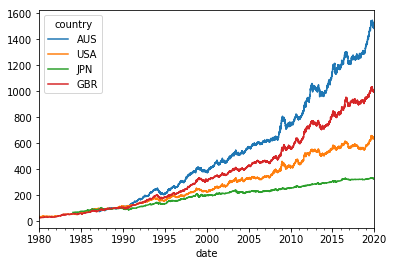

In [6]:
locs = ["AUS", "USA", "JPN", "GBR"]
bondReturnIdx_locFX.loc[tf[0]:tf[1], locs].plot()
plt.show()

In [7]:
bond_two_year_rolling_returns = bondReturnIdx_locFX.rolling(261*2, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)
bond_two_year_rolling_returns['mean'] = bond_two_year_rolling_returns.mean(axis=1)

In [8]:
bond_one_year_rolling_returns = bondReturnIdx_locFX.rolling(261, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)
bond_one_year_rolling_returns['mean'] = bond_one_year_rolling_returns.mean(axis=1)

In [9]:
bond_three_year_rolling_returns = bondReturnIdx_locFX.rolling(261*3, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)

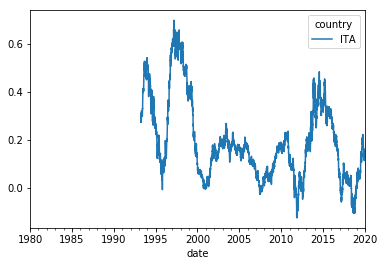

In [10]:
locs = ["ITA"]
bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].plot()
plt.show()

In [11]:
log_returns = np.log(bondReturnIdx_locFX)

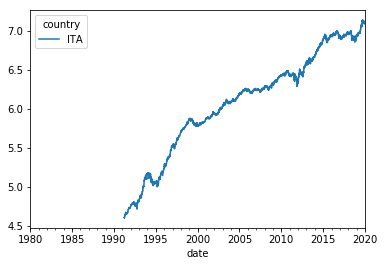

In [12]:
log_returns.loc[tf[0]:tf[1],locs].plot()
plt.show()

In [13]:
#dummy check
bond_two_year_logged_returns = log_returns.rolling(261*2, min_periods=100).apply(lambda x: x.iloc[-1] - x.iloc[0], raw=False)

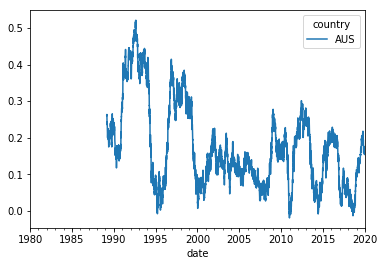

In [14]:
locs = ["AUS"]
bond_two_year_logged_returns.loc[tf[0]:tf[1],locs].plot()
plt.show()

In [15]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

In [16]:
bond_risk_premium = LongRates - ShortRates

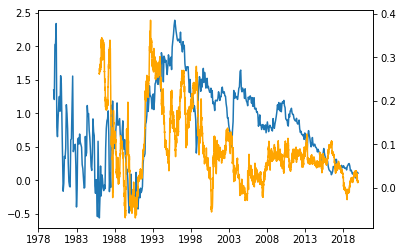

In [17]:
locs = ["JPN"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bond_risk_premium.loc[tf[0]:tf[1],locs].to_timestamp())
ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange")
plt.show()

In [18]:
delta_bond_risk_premium = bond_risk_premium.diff(1)

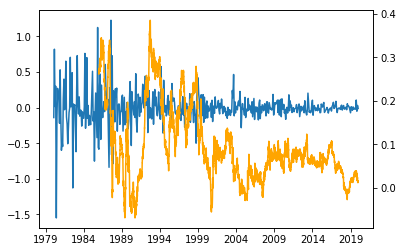

In [19]:
#Probably useless, just to see
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(delta_bond_risk_premium.loc[tf[0]:tf[1],locs].to_timestamp())
ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange")
plt.show()

In [20]:
curve_height = (LongRates + ShortRates) / 2

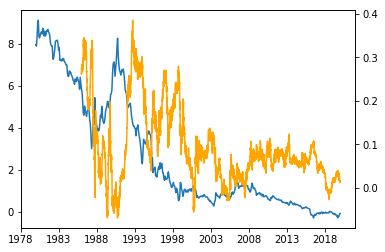

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(curve_height.loc[tf[0]:tf[1],locs].to_timestamp())
ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange")
plt.show()

In [22]:
delta_curve_height = curve_height.pct_change(1)

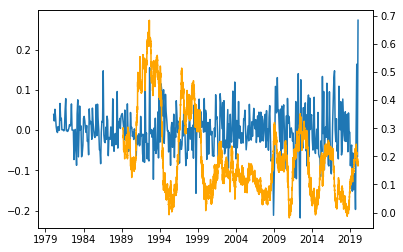

In [23]:
#Probably useless, just to see
locs = ["AUS"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(delta_curve_height.loc[tf[0]:tf[1],locs].to_timestamp())
ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange")
plt.show()

In [24]:
#Indicator 1 idea: Combining curve height and bond risk premium - if risk premium is high (steep) and curve high,
#we expect long rates to fall and yields to go up. If risk premium is high and curve low, would expect short rates to rise 
#but overall stay neutral. If risk premium low and curve high, might expect short rates to come down but to stay neutral long
#If low curve and low risk premium, people won't want these bonds and prices will go up - initial idea is to add the two

risk_premium_z_scores = (bond_risk_premium - bond_risk_premium.mean(0)) / bond_risk_premium.std(0)
height_z_scores = (curve_height - curve_height.mean(0)) / curve_height.std(0)

indicator_one_attempt_one = risk_premium_z_scores + height_z_scores


['1995-01-01', '2003-01-01']


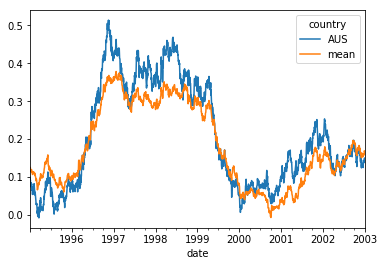

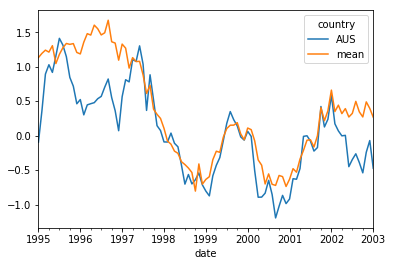

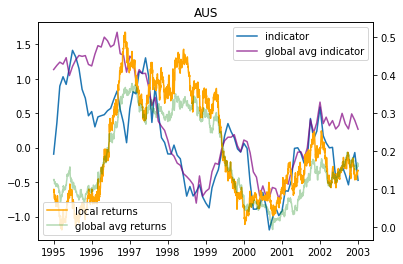

['2003-01-01', '2008-01-01']


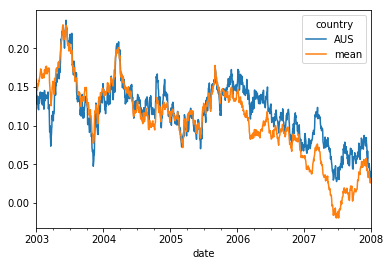

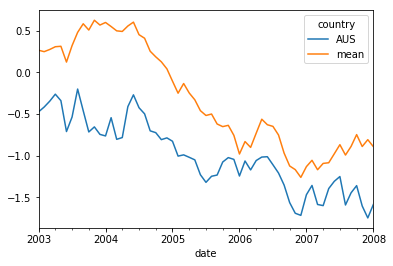

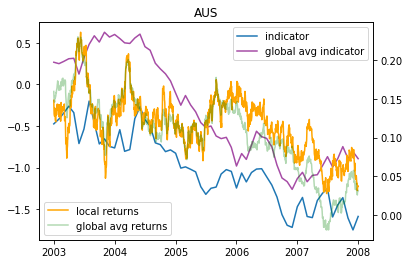

['2008-01-01', '2016-01-01']


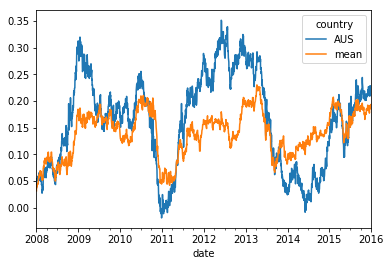

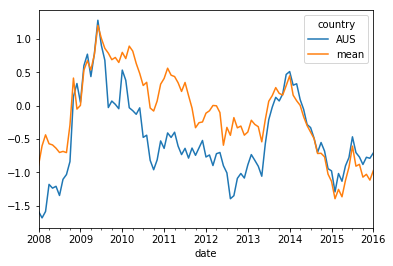

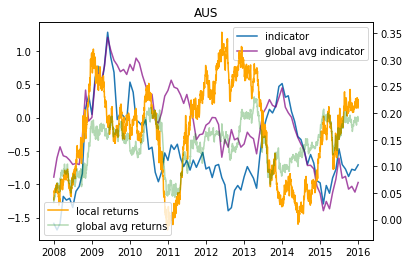

['2016-01-01', '2020-01-01']


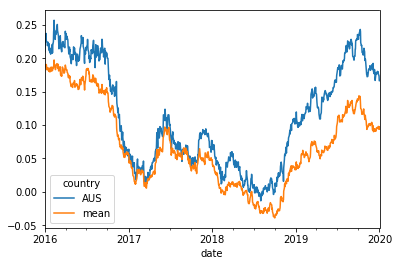

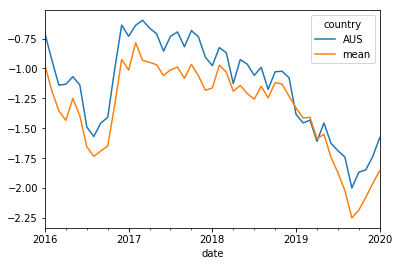

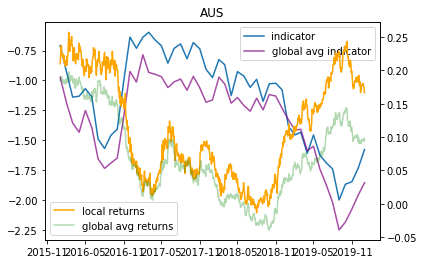

In [25]:


#locs = ["JPN", "USA", "CHE", "AUS", "ITA", "ESP", "FRA"]
indicator_one_attempt_one['mean'] = indicator_one_attempt_one.mean(axis=1)
tf1 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_one_attempt_one.loc[tf[0]:tf[1],locs+['mean']].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(indicator_one_attempt_one.loc[tf[0]:tf[1],country].to_timestamp())
        ax1.plot(indicator_one_attempt_one.loc[tf[0]:tf[1],'mean'].to_timestamp(), color = 'purple', alpha=.7)
        ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],country].to_timestamp(), color = "orange")
        ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],"mean"].to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator", 'global avg indicator'], loc = 'upper right')
        ax2.legend(["local returns", "global avg returns"], loc="lower left")
        plt.title(country)
        plt.show()

In [26]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

['1995-01-01', '2003-01-01']


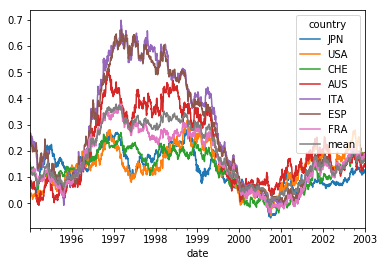

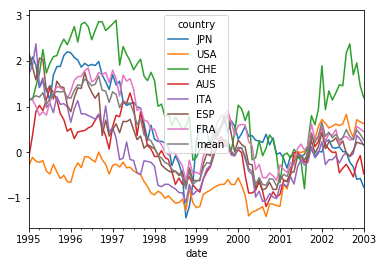

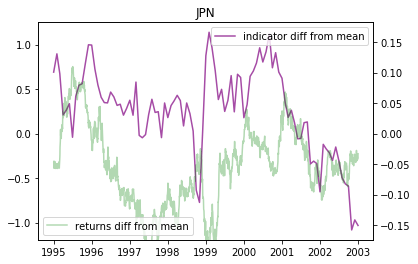

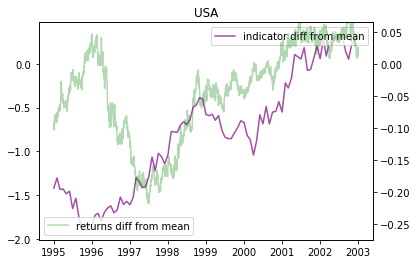

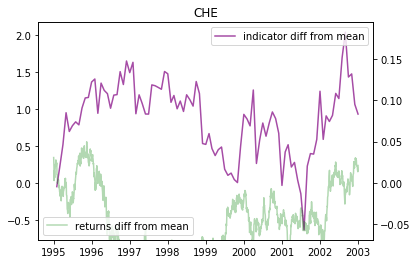

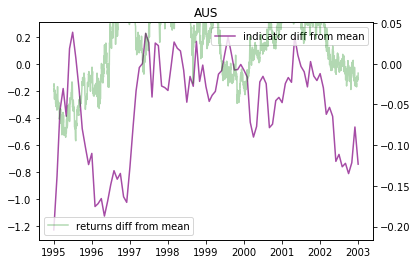

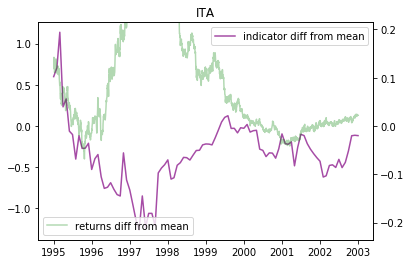

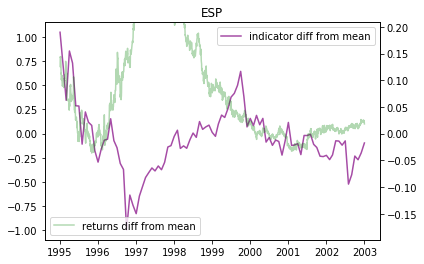

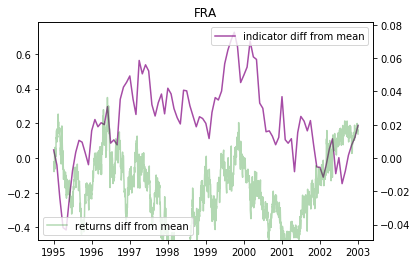

['2003-01-01', '2008-01-01']


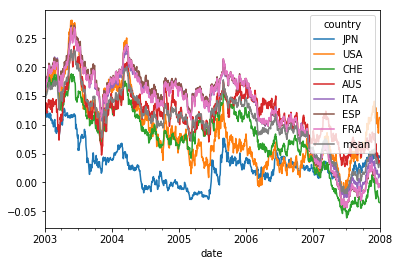

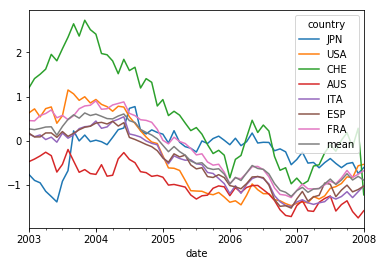

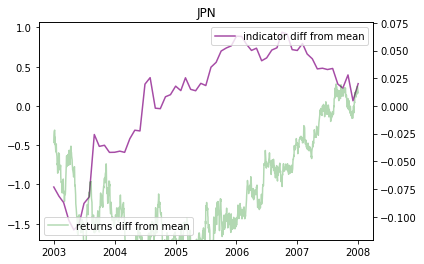

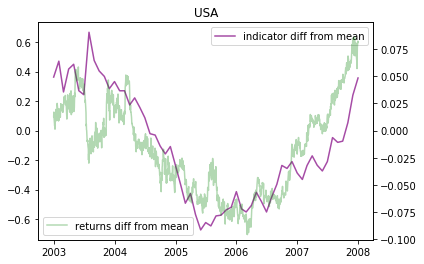

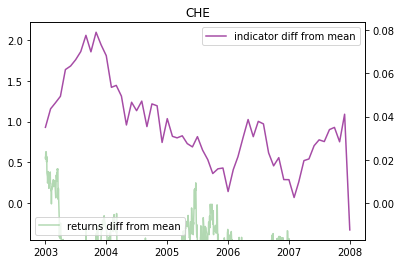

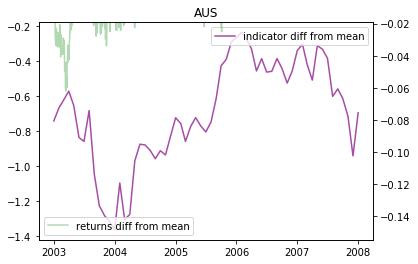

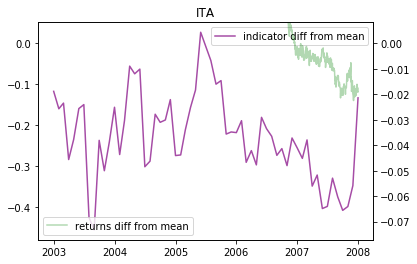

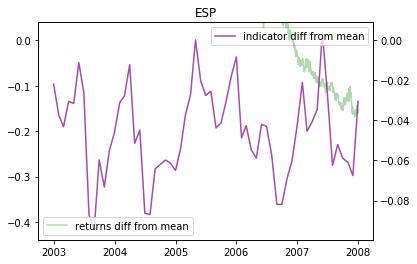

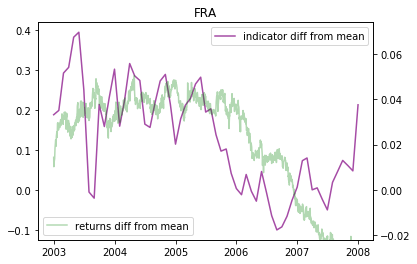

['2008-01-01', '2016-01-01']


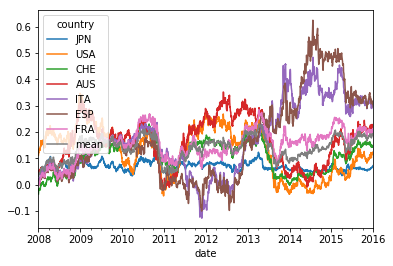

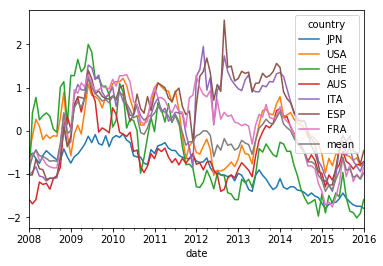

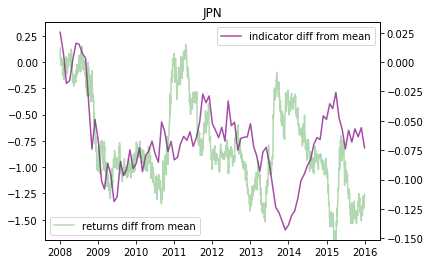

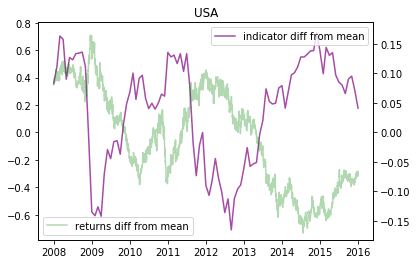

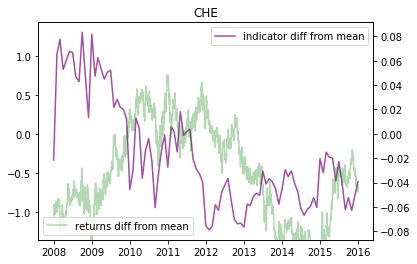

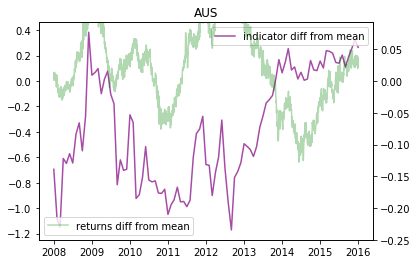

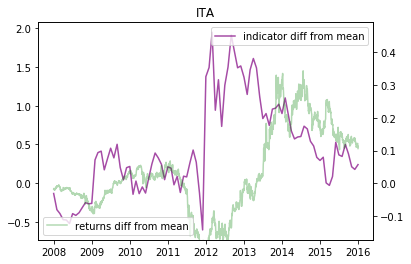

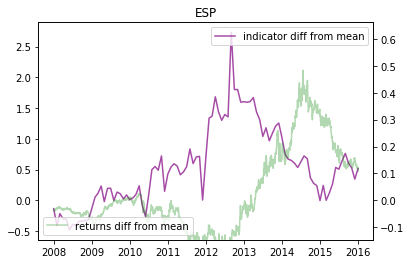

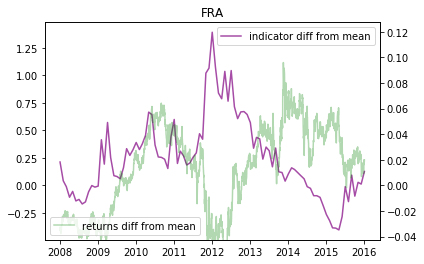

['2016-01-01', '2020-01-01']


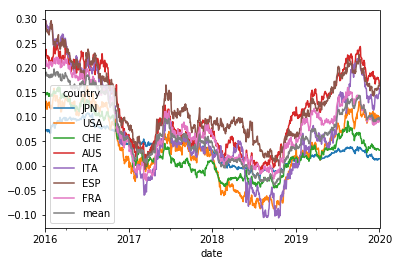

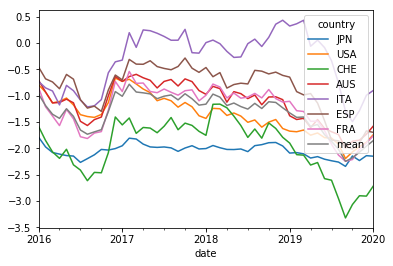

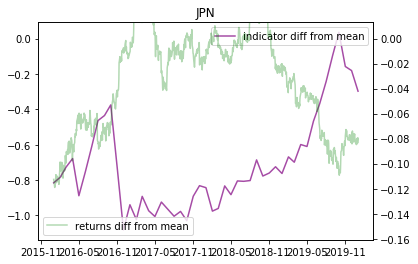

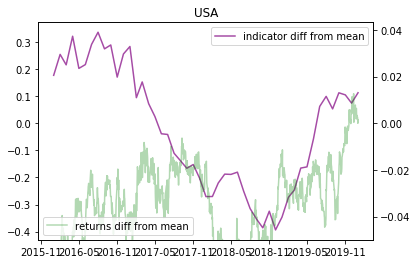

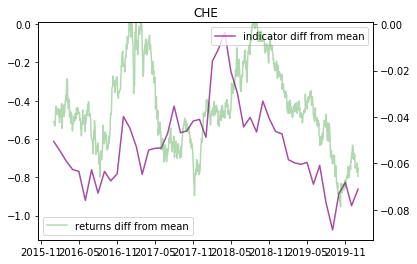

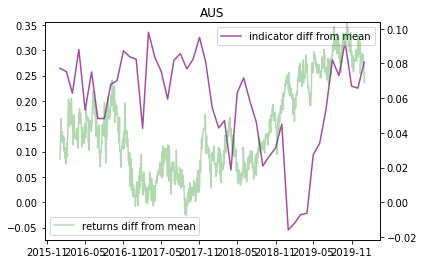

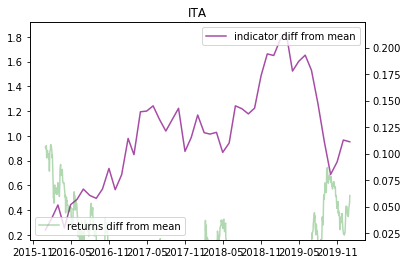

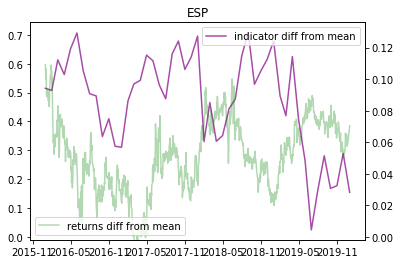

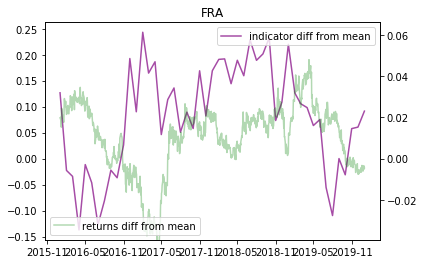

In [27]:
locs = ["JPN", "USA", "CHE", "AUS", "ITA", "ESP", "FRA"]
indicator_one_attempt_one['mean'] = indicator_one_attempt_one.mean(axis=1)
tf1 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_one_attempt_one.loc[tf[0]:tf[1],locs+['mean']].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        indicator_diff_from_global = indicator_one_attempt_one.loc[tf[0]:tf[1],country] - indicator_one_attempt_one.loc[tf[0]:tf[1],'mean']
        ax1.plot(indicator_diff_from_global.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = bond_two_year_rolling_returns.loc[tf[0]:tf[1],country] - bond_two_year_rolling_returns.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator diff from mean"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()

In [58]:
#Indicator one attempt two idea
#Keep track of global mean and generate n year historical difference for each country to represent the "norm" for that country
#Measure changes from that "norm" as signal and compare signals to each other (subtract mean signal at each time step)
#Idea a) take linear combination of risk premium and curve height - come up with global average and relative country average 
#        over time and use difference at a particular time for each country to generate signal (will by construction be net 
#        zero signal)
#Idea b) come up with global average and relative country average for both risk premium and curve height over time and take 
#        linear combination of deviations from norm for each at a given time to generate signal - subtract off mean of signals
#        to create net zero signal (personally like this idea)
#Idea c) scale or divide signal by average?
#Idea d) scale signal size based on relative difference in size from past changes
#
#
# Regression tests and review returns
#
#
#Idea a)
#dividing by the range of each input to give relatively equal value to each 
indicator_one_a = bond_risk_premium / (bond_risk_premium.max().max() - bond_risk_premium.min().min()) + \
                    curve_height / (curve_height.max().max() - curve_height.min().min())
indicator_one_a["mean"] = indicator_one_a.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_a[s] = indicator_one_a[country] - indicator_one_a["mean"] 
    
#rolling average window size
n = 2
for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_a[s2] = indicator_one_a[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()

for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_a[s0] = indicator_one_a["mean"] + indicator_one_a[s1]

for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_a[s0] = indicator_one_a[country] - indicator_one_a[s1]
    
    
    
    
    
indicator_one_a.loc[:, ["USA", "mean", "USAdiff", "USAavgdiff", "USAnorm", "USAsignal"]] 
    
    
    
    
    
    

country       USA      mean   USAdiff  USAavgdiff   USAnorm  USAsignal
date                                                                  
1980-01  0.453451  0.583568 -0.130117         NaN       NaN        NaN
1980-02  0.531592  0.559734 -0.028141         NaN       NaN        NaN
1980-03  0.418801  0.581868 -0.163066         NaN       NaN        NaN
1980-04  0.434641  0.622093 -0.187451         NaN       NaN        NaN
1980-05  0.585855  0.677434 -0.091579         NaN       NaN        NaN
1980-06  0.740449  0.627215  0.113233         NaN       NaN        NaN
1980-07  0.753244  0.623628  0.129616         NaN       NaN        NaN
1980-08  0.767784  0.648336  0.119448         NaN       NaN        NaN
1980-09  0.691339  0.645815  0.045523         NaN       NaN        NaN
1980-10  0.638265  0.645604 -0.007340         NaN       NaN        NaN
1980-11  0.595577  0.628116 -0.032539         NaN       NaN        NaN
1980-12  0.535655  0.624703 -0.089048         NaN       NaN        NaN
1981-01  0.615429  0.642383 -0.026954         NaN       NaN        NaN
1981-02  0.636996  0.631631  0.005365         NaN       NaN        NaN
1981-03  0.660529  0.629760  0.030768         NaN       NaN        NaN
1981-04  0.745498  0.611723  0.133776         NaN       NaN        NaN
1981-05  0.702126  0.619424  0.082702         NaN       NaN        NaN
1981-06  0.615917  0.629294 -0.013377         NaN       NaN        NaN
1981-07  0.666113  0.599447  0.066666         NaN       NaN        NaN
1981-08  0.670508  0.660047  0.010461         NaN       NaN        NaN
1981-09  0.672222  0.693760 -0.021538         NaN       NaN        NaN
1981-10  0.776460  0.712816  0.063644         NaN       NaN        NaN
1981-11  0.855204  0.730654  0.124549         NaN       NaN        NaN
1981-12  0.868085  0.716341  0.151744         NaN       NaN        NaN
1982-01  0.855284  0.693158  0.162125    0.011931  0.705089   0.150194
1982-02  0.764865  0.677928  0.086937    0.024108  0.702036   0.062829
1982-03  0.732266  0.646661  0.085605    0.028903  0.675564   0.056702
1982-04  0.758923  0.663241  0.095683    0.039264  0.702505   0.056419
1982-05  0.771897  0.646131  0.125767    0.051061  0.697192   0.074705
1982-06  0.800028  0.718238  0.081790    0.060117  0.778355   0.021672
...           ...       ...       ...         ...       ...        ...
2018-03  0.252451  0.236650  0.015800    0.050248  0.286898  -0.034447
2018-04  0.231489  0.212019  0.019470    0.048146  0.260165  -0.028676
2018-05  0.242085  0.220813  0.021272    0.045597  0.266411  -0.024325
2018-06  0.231741  0.213625  0.018116    0.043791  0.257416  -0.025675
2018-07  0.212724  0.207131  0.005593    0.041849  0.248980  -0.036256
2018-08  0.221598  0.223477 -0.001878    0.039139  0.262616  -0.041018
2018-09  0.198054  0.210565 -0.012511    0.035846  0.246411  -0.048357
2018-10  0.216150  0.228696 -0.012546    0.032411  0.261107  -0.044957
2018-11  0.224750  0.227515 -0.002765    0.028830  0.256346  -0.031596
2018-12  0.195794  0.212456 -0.016662    0.026234  0.238690  -0.042896
2019-01  0.183991  0.197438 -0.013448    0.021972  0.219411  -0.035420
2019-02  0.182142  0.185207 -0.003065    0.017672  0.202878  -0.020737
2019-03  0.188122  0.186092  0.002030    0.014959  0.201051  -0.012929
2019-04  0.169326  0.159162  0.010164    0.012171  0.171333  -0.002007
2019-05  0.176138  0.163771  0.012367    0.010286  0.174057   0.002081
2019-06  0.156421  0.135177  0.021244    0.008827  0.144004   0.012417
2019-07  0.154440  0.113958  0.040482    0.008244  0.122202   0.032238
2019-08  0.134647  0.092502  0.042145    0.008397  0.100899   0.033748
2019-09  0.086326  0.058504  0.027822    0.009064  0.067569   0.018757
2019-10  0.107796  0.066454  0.041342    0.009472  0.075926   0.031870
2019-11  0.124630  0.082888  0.041742    0.010500  0.093388   0.031242
2019-12  0.139450  0.100991  0.038458    0.011409  0.112401   0.027049
2020-01  0.163260  0.116528  0.046732    0.012576  0.129104   0.034156
2020-02  0.112861  0.068

In [68]:
indicator_one_a_signals = list(indicator_one_a.columns)[-10:]
signalsdf = indicator_one_a.loc[:, indicator_one_a_signals] 
indicator_one_b_signals = indicator_one_a_signals 
signalsdf

country  USAsignal  AUSsignal  JPNsignal  CANsignal  CHEsignal  GBRsignal  \
date                                                                        
1980-01        NaN        NaN        NaN        NaN        NaN        NaN   
1980-02        NaN        NaN        NaN        NaN        NaN        NaN   
1980-03        NaN        NaN        NaN        NaN        NaN        NaN   
1980-04        NaN        NaN        NaN        NaN        NaN        NaN   
1980-05        NaN        NaN        NaN        NaN        NaN        NaN   
1980-06        NaN        NaN        NaN        NaN        NaN        NaN   
1980-07        NaN        NaN        NaN        NaN        NaN        NaN   
1980-08        NaN        NaN        NaN        NaN        NaN        NaN   
1980-09        NaN        NaN        NaN        NaN        NaN        NaN   
1980-10        NaN        NaN        NaN        NaN        NaN        NaN   
1980-11        NaN        NaN        NaN        NaN        NaN        NaN   
1980-12        NaN        NaN        NaN        NaN        NaN        NaN   
1981-01        NaN        NaN        NaN        NaN        NaN        NaN   
1981-02        NaN        NaN        NaN        NaN        NaN        NaN   
1981-03        NaN        NaN        NaN        NaN        NaN        NaN   
1981-04        NaN        NaN        NaN        NaN        NaN        NaN   
1981-05        NaN        NaN        NaN        NaN        NaN        NaN   
1981-06        NaN        NaN        NaN        NaN        NaN        NaN   
1981-07        NaN        NaN        NaN        NaN        NaN        NaN   
1981-08        NaN        NaN        NaN        NaN        NaN        NaN   
1981-09        NaN        NaN        NaN        NaN        NaN        NaN   
1981-10        NaN        NaN        NaN        NaN        NaN        NaN   
1981-11        NaN        NaN        NaN        NaN        NaN        NaN   
1981-12        NaN        NaN        NaN        NaN        NaN        NaN   
1982-01   0.150194   0.137339  -0.264509        NaN        NaN        NaN   
1982-02   0.062829   0.119767  -0.249046        NaN        NaN        NaN   
1982-03   0.056702   0.118210  -0.205118        NaN        NaN        NaN   
1982-04   0.056419   0.063264  -0.108528        NaN        NaN        NaN   
1982-05   0.074705   0.021910  -0.072597        NaN        NaN        NaN   
1982-06   0.021672   0.075319  -0.033326        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
2018-03  -0.034447  -0.005998  -0.017512  -0.028218   0.038809  -0.040376   
2018-04  -0.028676  -0.017894   0.005116  -0.017924   0.055829  -0.045478   
2018-05  -0.024325   0.004314  -0.003116   0.000191   0.029686  -0.032319   
2018-06  -0.025675   0.004217   0.005228  -0.009817   0.019272  -0.025120   
2018-07  -0.036256  -0.003626   0.006485  -0.017332   0.003513  -0.030778   
2018-08  -0.041018  -0.009044   0.005383  -0.016197   0.001674  -0.031578   
2018-09  -0.048357  -0.024629   0.022614  -0.028656  -0.000969  -0.002056   
2018-10  -0.044957  -0.019704   0.010639  -0.020237   0.007383   0.003273   
2018-11  -0.031596  -0.017632   0.014901  -0.028180  -0.000917  -0.012753   
2018-12  -0.042896  -0.009247   0.022555  -0.037634  -0.001328  -0.018486   
2019-01  -0.035420  -0.040121   0.019756  -0.031972   0.003646  -0.013665   
2019-02  -0.020737  -0.037866   0.031406  -0.013812  -0.004518  -0.005993   
2019-03  -0.012929  -0.036394   0.025759  -0.006980  -0.007423   0.000199   
2019-04  -0.002007  -0.038435   0.041563  -0.003772   0.001565  -0.005006   
2019-05   0.002081  -0.022516   0.037888  -0.002624   0.000055   0.001804   
2019-06   0.012417  -0.021314   0.057791  -0.000191   0.000374  -0.004591   
2019-07   0.032238  -0.011650   0.071898   0.013621   0.018331   0.001007   
2019-08   0.033748   0.000714   0.086960   0.019757   0.007240   0.003626   
2019-09   0.018757  -0.004615   0.104942   0.023654   0.008092   0.015645

['1986-01-01', '1995-01-01']


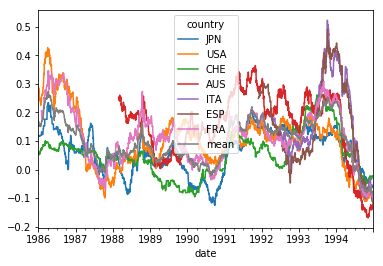

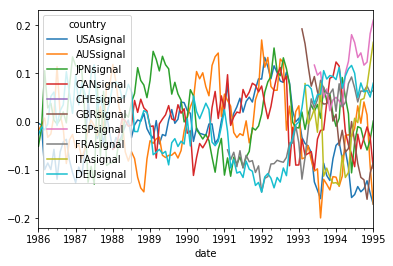

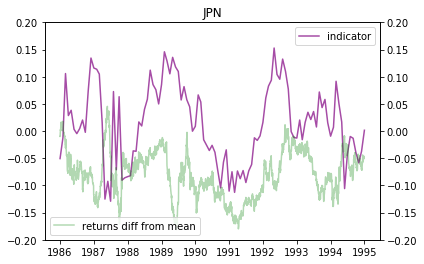

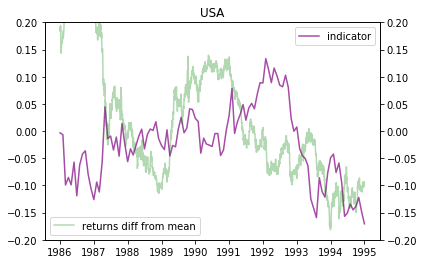

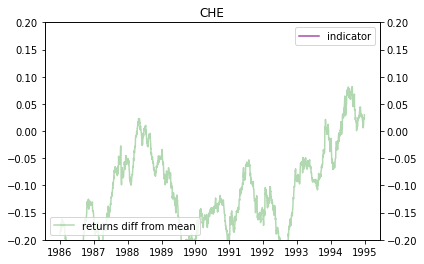

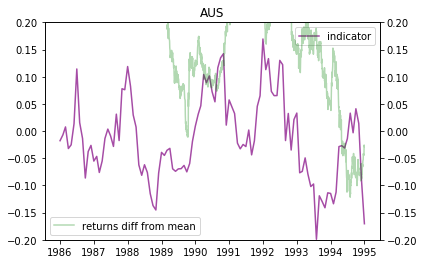

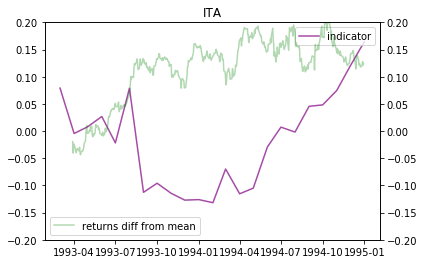

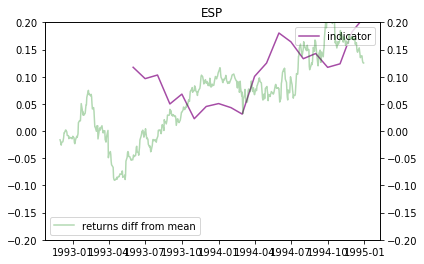

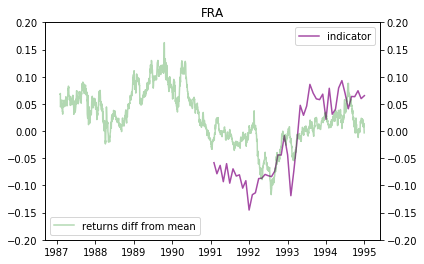

['1995-01-01', '2003-01-01']


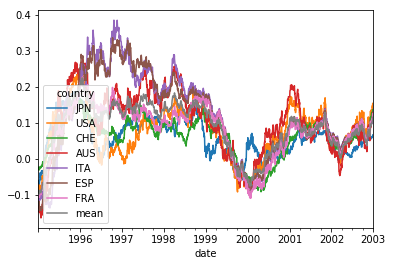

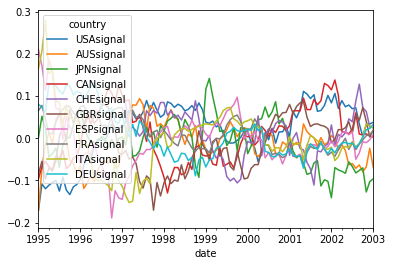

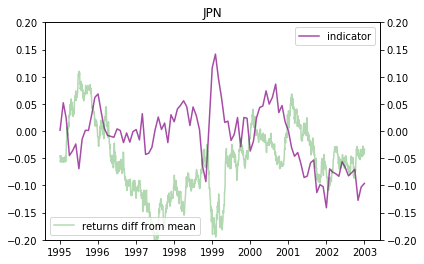

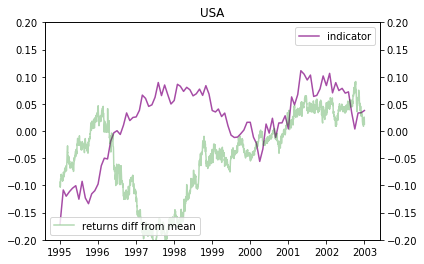

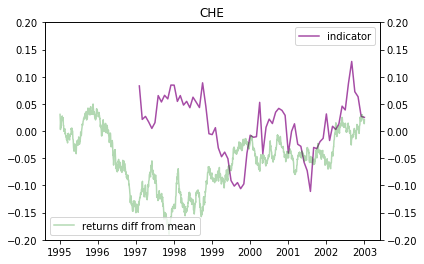

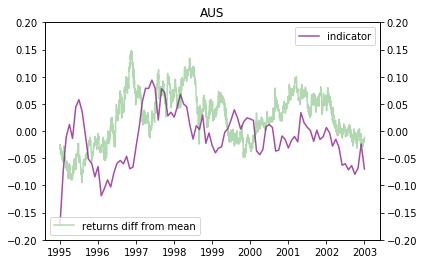

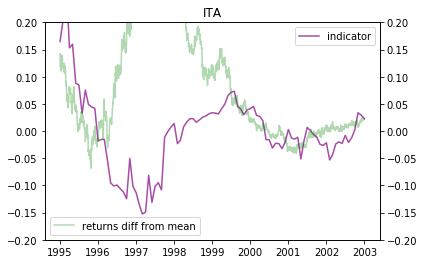

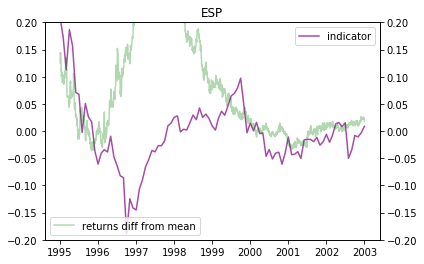

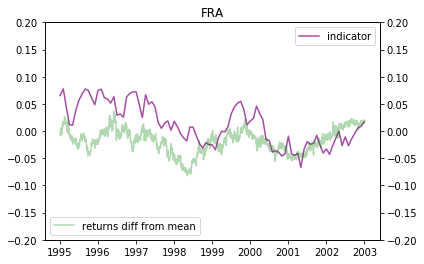

['2003-01-01', '2008-01-01']


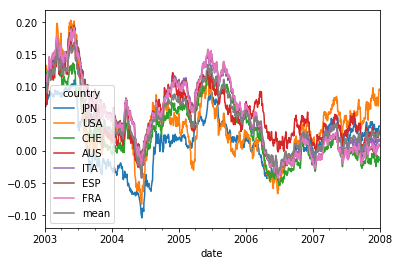

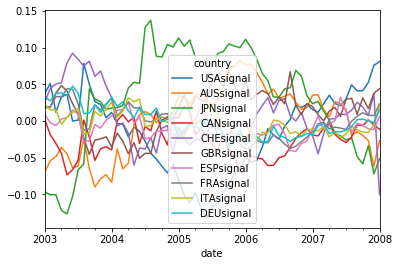

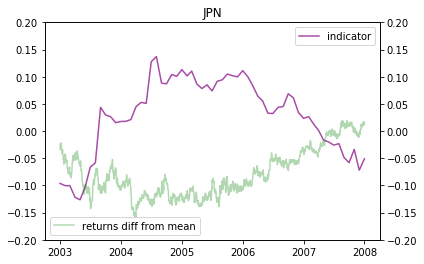

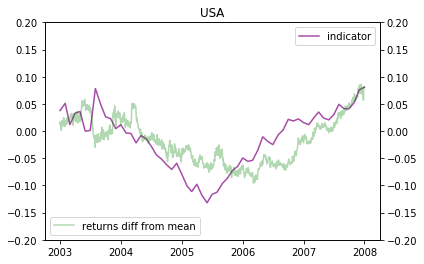

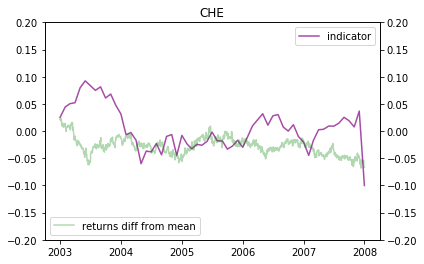

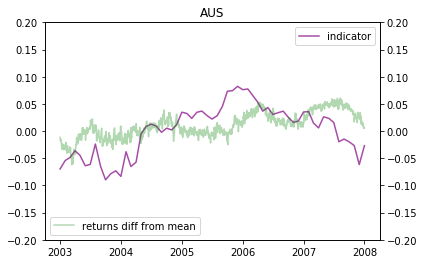

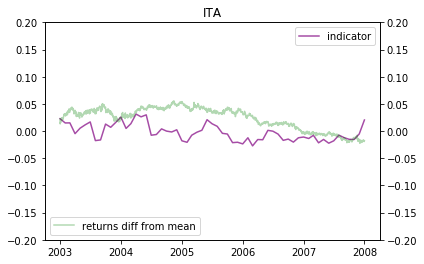

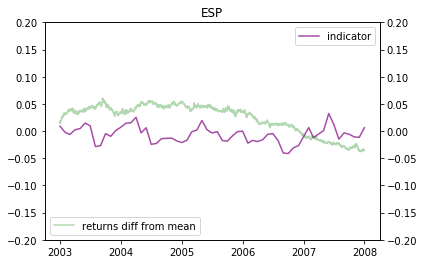

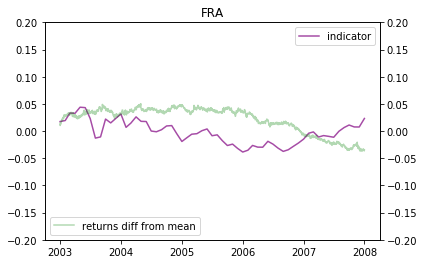

['2008-01-01', '2016-01-01']


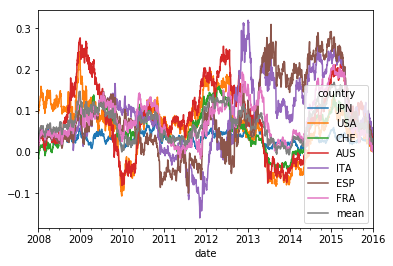

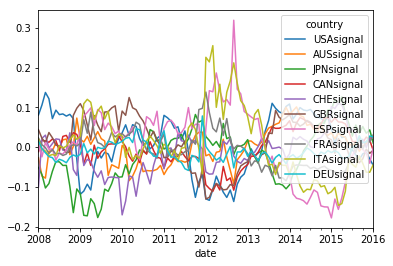

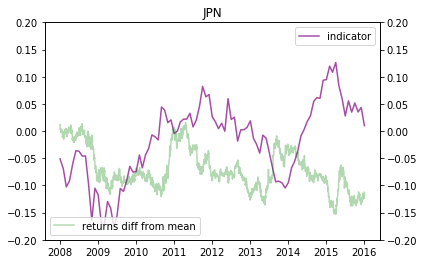

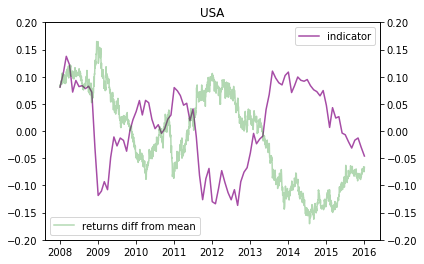

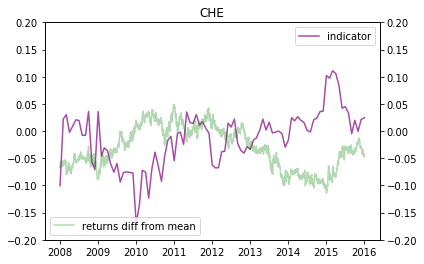

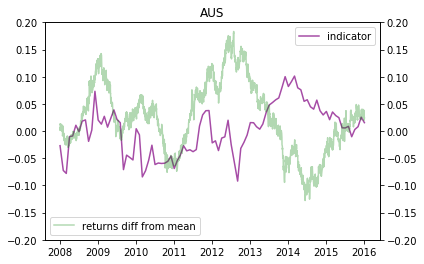

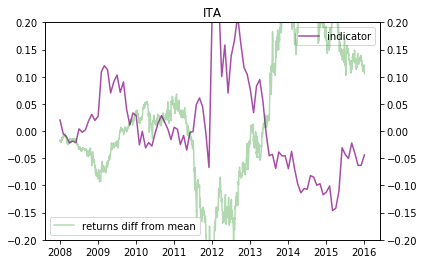

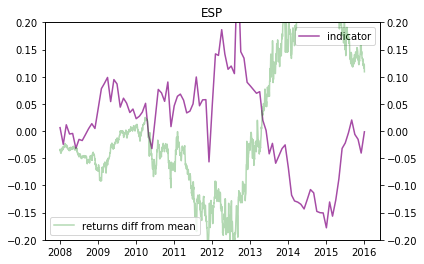

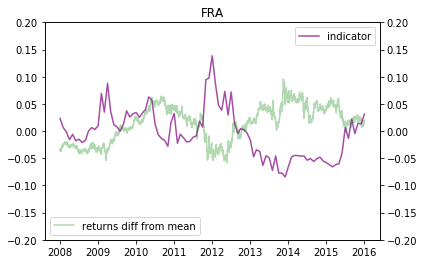

['2016-01-01', '2020-01-01']


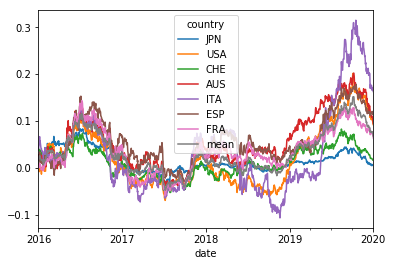

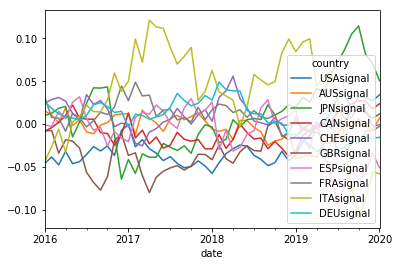

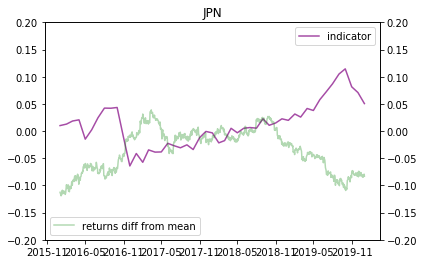

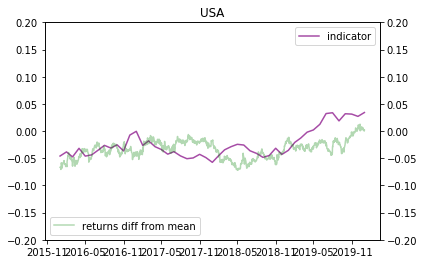

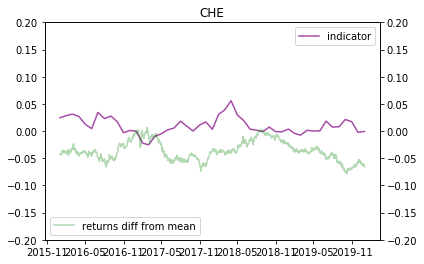

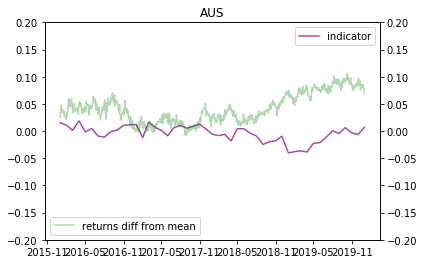

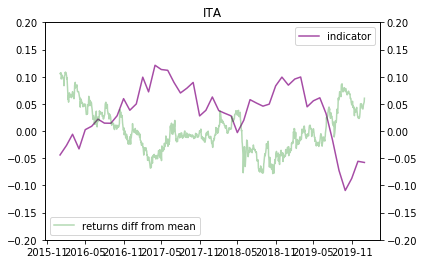

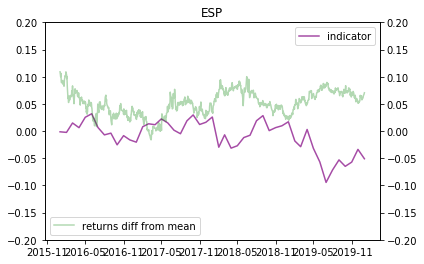

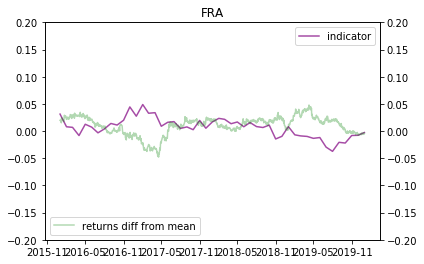

In [61]:
locs = ["JPN", "USA", "CHE", "AUS", "ITA", "ESP", "FRA"]
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    signalsdf.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signalsdf.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = bond_two_year_rolling_returns.loc[tf[0]:tf[1],country] - bond_two_year_rolling_returns.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()

In [93]:
#idea 1b)

indicator_one_b_risk = bond_risk_premium

'''/ (bond_risk_premium.max().max() - bond_risk_premium.min().min()) + \
                    curve_height / (curve_height.max().max() - curve_height.min().min())'''

indicator_one_b_risk["mean"] = indicator_one_b_risk.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_risk[s] = indicator_one_b_risk[country] - indicator_one_b_risk["mean"] 
    
#rolling average window size
n = 10
for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_risk[s2] = indicator_one_b_risk[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()

for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_risk[s0] = indicator_one_b_risk["mean"] + indicator_one_b_risk[s1]

for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_risk[s0] = indicator_one_b_risk[country] - indicator_one_b_risk[s1]
    
    
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min())

#indicator_one_b_risk.loc[:, ["USA", "mean", "USAdiff", "USAavgdiff", "USAnorm", "USAsignal"]] 
    

indicator_one_b_height = curve_height

'''/ (bond_risk_premium.max().max() - bond_risk_premium.min().min()) + \
                    curve_height / (curve_height.max().max() - curve_height.min().min())'''

indicator_one_b_height["mean"] = indicator_one_b_height.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_height[s] = indicator_one_b_height[country] - indicator_one_b_height["mean"] 
    
#rolling average window size
n = 10
for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_height[s2] = indicator_one_b_height[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()

for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_height[s0] = indicator_one_b_height["mean"] + indicator_one_b_height[s1]

for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_height[s0] = indicator_one_b_height[country] - indicator_one_b_height[s1]
    
    
print(indicator_one_b_height.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

#scaling each component by its size or range - could consider other scaling methods like std
signal = indicator_one_b_risk.loc[:, indicator_one_b_signals] / (indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min()) + \
        indicator_one_b_height.loc[:, indicator_one_b_signals] / (indicator_one_b_height.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

signal["mean"] = signal.mean(axis = 1)
signal_centered = signal.subtract(signal["mean"], axis = 0)
signal_centered
    
    
    
    

2.5707745848410153
-1.6870428142464513
3.3362779312276727
-5.478371658865207


country  USAsignal  AUSsignal  JPNsignal  CANsignal  CHEsignal  GBRsignal  \
date                                                                        
1980-01        NaN        NaN        NaN        NaN        NaN        NaN   
1980-02        NaN        NaN        NaN        NaN        NaN        NaN   
1980-03        NaN        NaN        NaN        NaN        NaN        NaN   
1980-04        NaN        NaN        NaN        NaN        NaN        NaN   
1980-05        NaN        NaN        NaN        NaN        NaN        NaN   
1980-06        NaN        NaN        NaN        NaN        NaN        NaN   
1980-07        NaN        NaN        NaN        NaN        NaN        NaN   
1980-08        NaN        NaN        NaN        NaN        NaN        NaN   
1980-09        NaN        NaN        NaN        NaN        NaN        NaN   
1980-10        NaN        NaN        NaN        NaN        NaN        NaN   
1980-11        NaN        NaN        NaN        NaN        NaN        NaN   
1980-12        NaN        NaN        NaN        NaN        NaN        NaN   
1981-01        NaN        NaN        NaN        NaN        NaN        NaN   
1981-02        NaN        NaN        NaN        NaN        NaN        NaN   
1981-03        NaN        NaN        NaN        NaN        NaN        NaN   
1981-04        NaN        NaN        NaN        NaN        NaN        NaN   
1981-05        NaN        NaN        NaN        NaN        NaN        NaN   
1981-06        NaN        NaN        NaN        NaN        NaN        NaN   
1981-07        NaN        NaN        NaN        NaN        NaN        NaN   
1981-08        NaN        NaN        NaN        NaN        NaN        NaN   
1981-09        NaN        NaN        NaN        NaN        NaN        NaN   
1981-10        NaN        NaN        NaN        NaN        NaN        NaN   
1981-11        NaN        NaN        NaN        NaN        NaN        NaN   
1981-12        NaN        NaN        NaN        NaN        NaN        NaN   
1982-01        NaN        NaN        NaN        NaN        NaN        NaN   
1982-02        NaN        NaN        NaN        NaN        NaN        NaN   
1982-03        NaN        NaN        NaN        NaN        NaN        NaN   
1982-04        NaN        NaN        NaN        NaN        NaN        NaN   
1982-05        NaN        NaN        NaN        NaN        NaN        NaN   
1982-06        NaN        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
2018-03  -0.000598   0.040647   0.002786   0.037324   0.102402  -0.089802   
2018-04   0.007723   0.024862   0.032863   0.050341   0.126122  -0.096788   
2018-05   0.017313   0.051619   0.016145   0.074869   0.094604  -0.086545   
2018-06   0.008841   0.045438   0.023314   0.054573   0.076004  -0.088148   
2018-07  -0.003431   0.034499   0.025683   0.043137   0.059525  -0.094529   
2018-08  -0.011274   0.025911   0.019440   0.044841   0.053843  -0.096446   
2018-09  -0.028608  -0.000049   0.037065   0.022623   0.047446  -0.060117   
2018-10  -0.025156   0.004316   0.014571   0.036294   0.055840  -0.051312   
2018-11  -0.011494   0.005616   0.017076   0.024147   0.044133  -0.075323   
2018-12  -0.030233   0.017976   0.028943   0.004903   0.043508  -0.085790   
2019-01  -0.034060  -0.026272   0.031355   0.002529   0.052609  -0.077925   
2019-02  -0.020346  -0.029374   0.047635   0.021171   0.041143  -0.069500   
2019-03  -0.013462  -0.033009   0.043272   0.024252   0.037247  -0.062851   
2019-04  -0.008554  -0.045617   0.068364   0.022172   0.050788  -0.072109   
2019-05  -0.006909  -0.032067   0.067036   0.020332   0.049753  -0.059462   
2019-06  -0.008286  -0.035828   0.099812   0.016724   0.050937  -0.070529   
2019-07   0.017748  -0.026256   0.124490   0.041224   0.076741  -0.059217   
2019-08   0.017097  -0.014375   0.152158   0.049723   0.060677  -0.060776   
2019-09  -0.007879  -0.024739   0.182878   0.052993   0.062106  -0.043681

['1986-01-01', '1995-01-01']


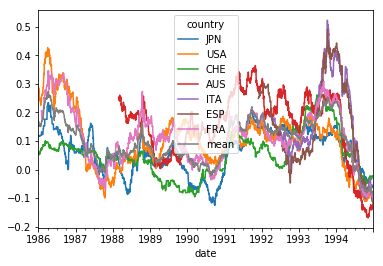

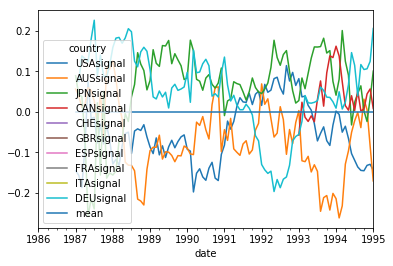

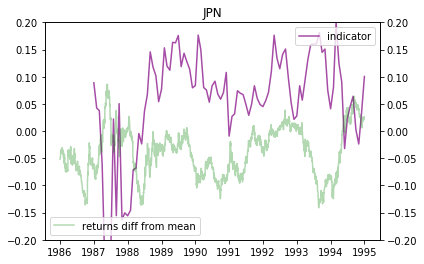

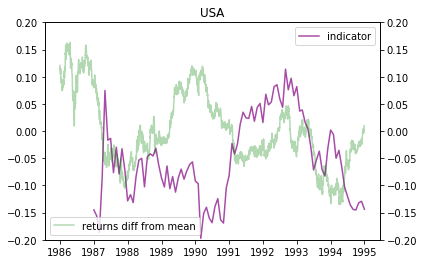

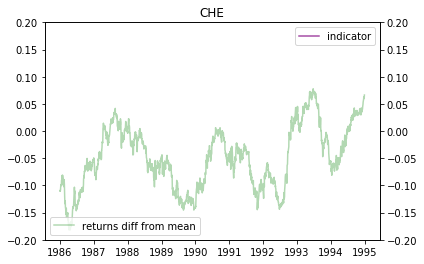

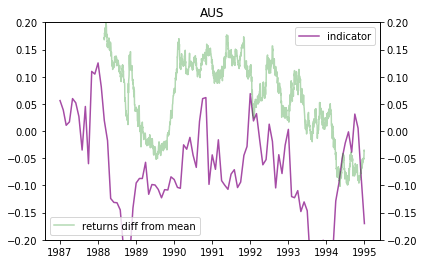

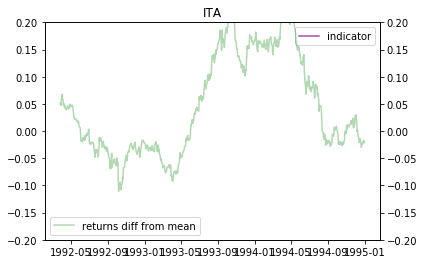

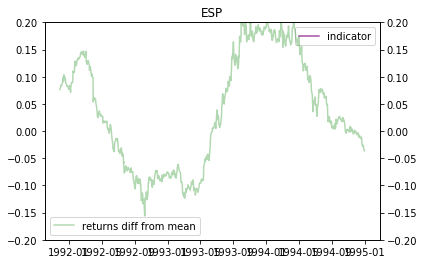

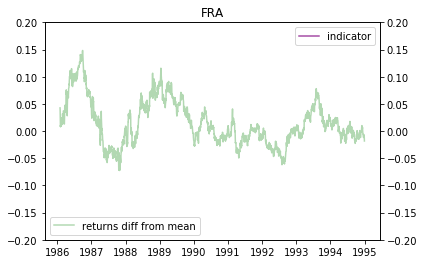

['1995-01-01', '2003-01-01']


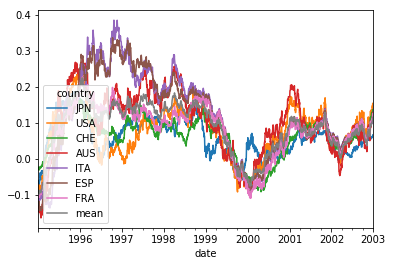

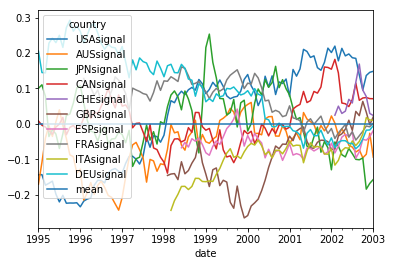

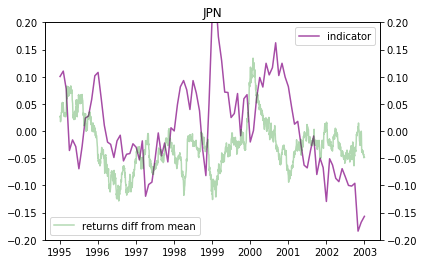

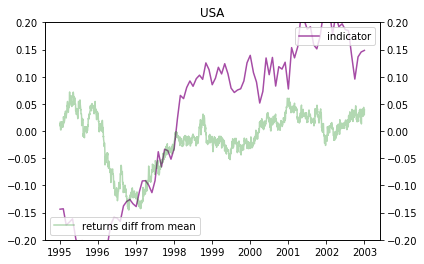

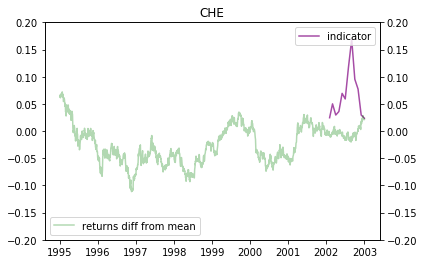

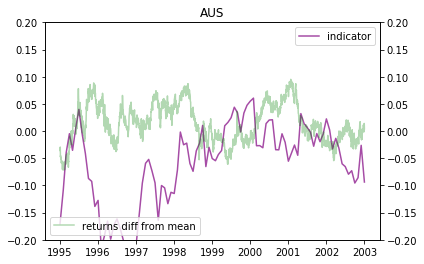

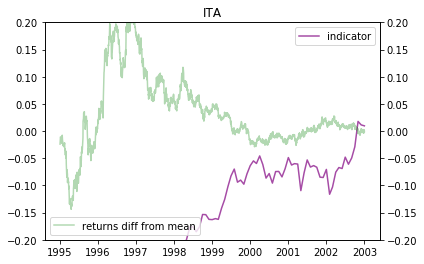

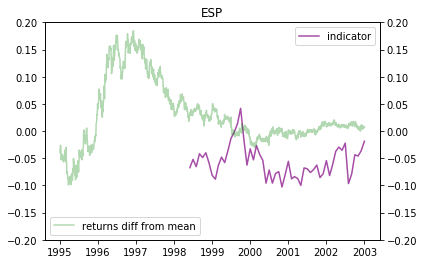

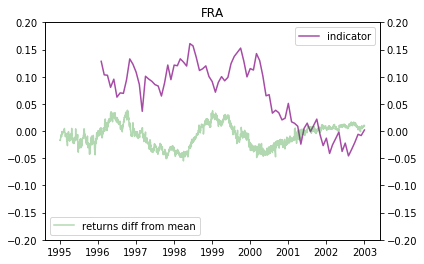

['2003-01-01', '2008-01-01']


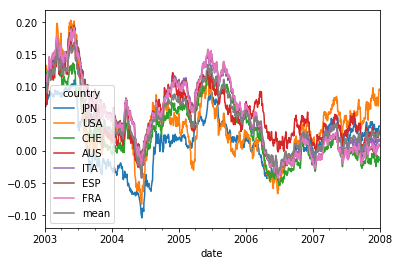

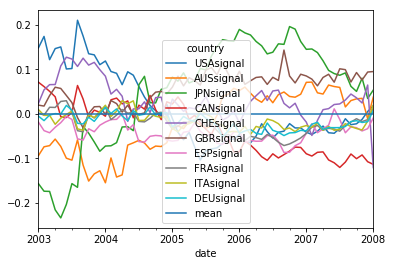

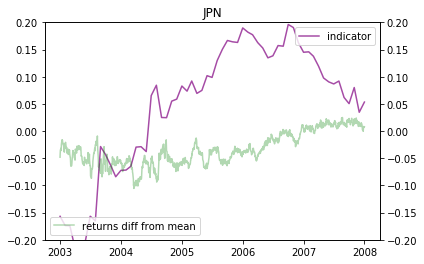

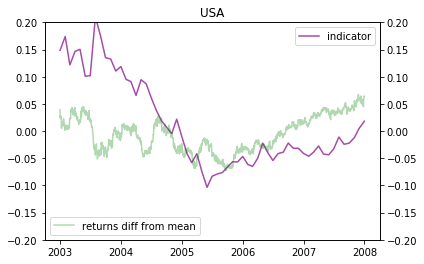

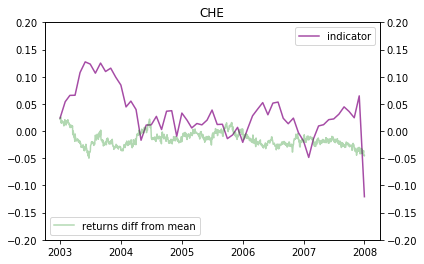

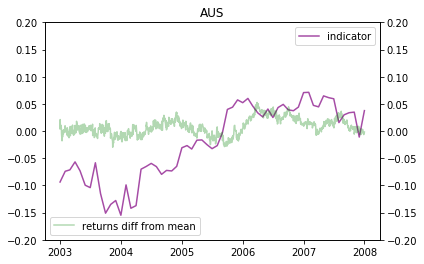

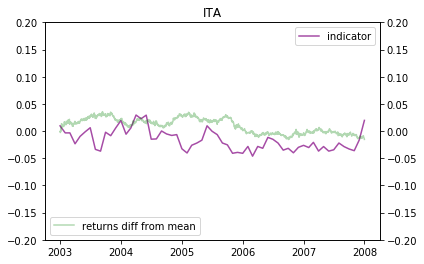

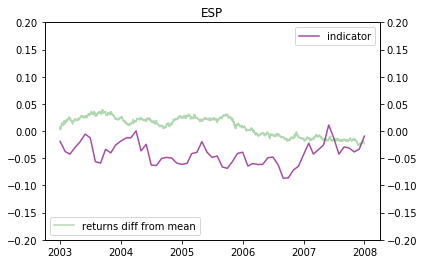

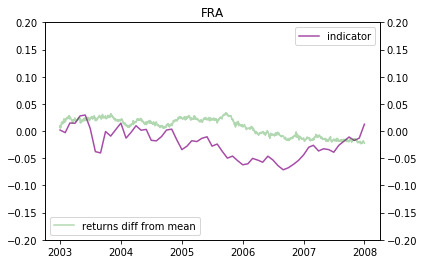

['2008-01-01', '2016-01-01']


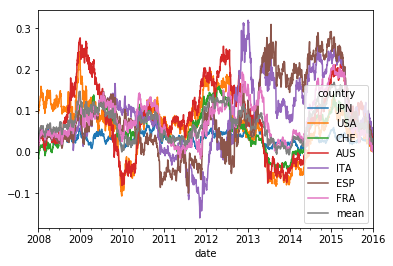

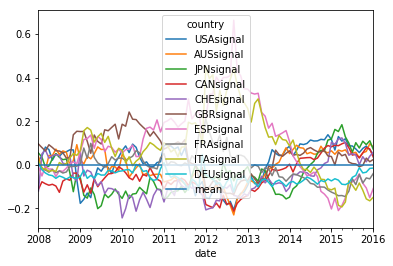

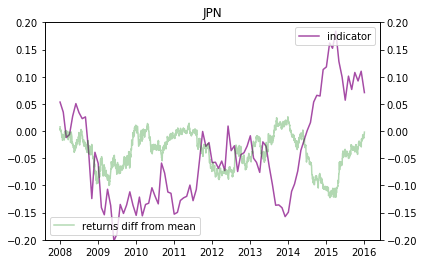

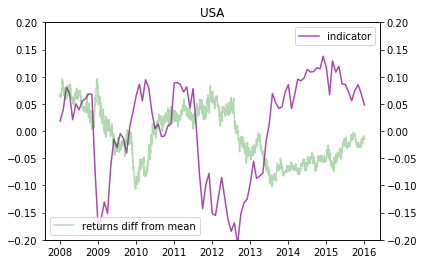

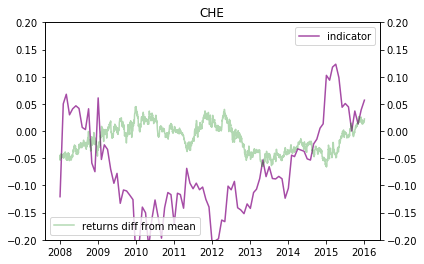

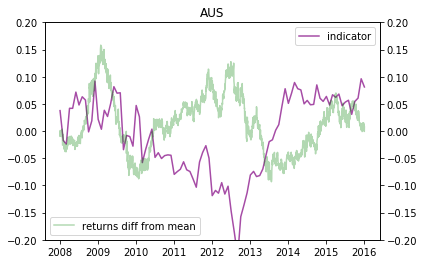

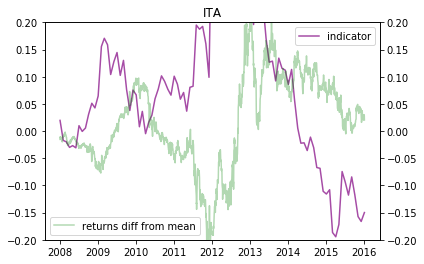

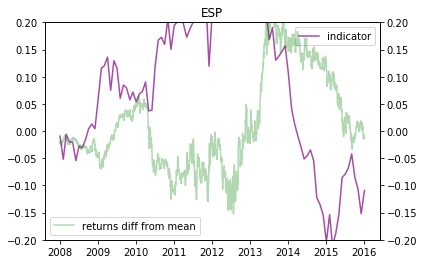

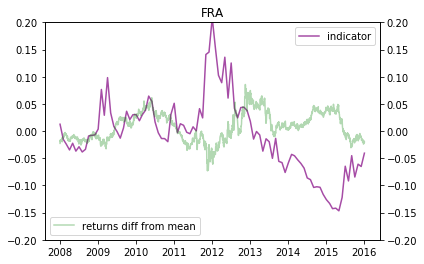

['2016-01-01', '2020-01-01']


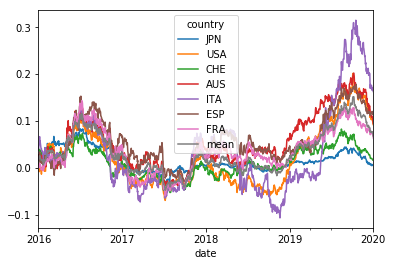

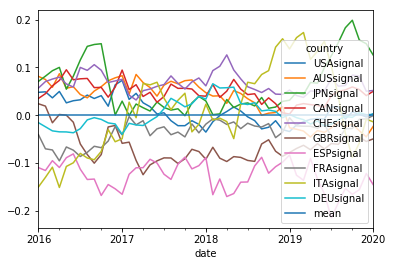

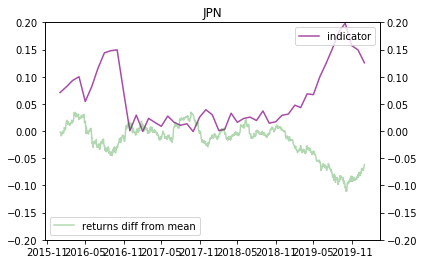

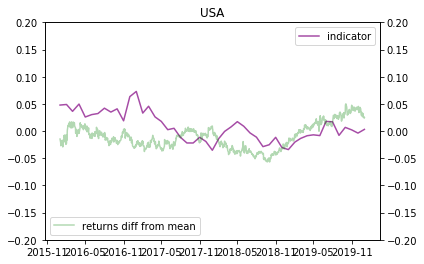

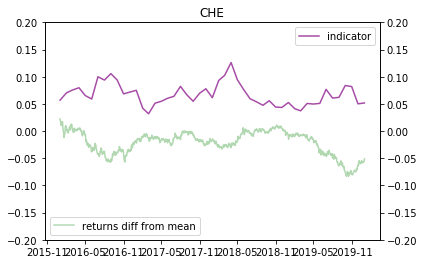

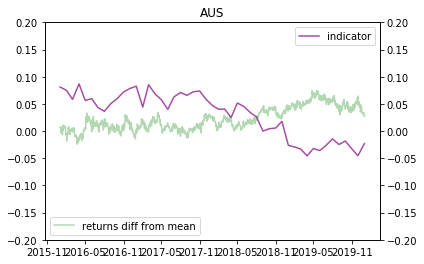

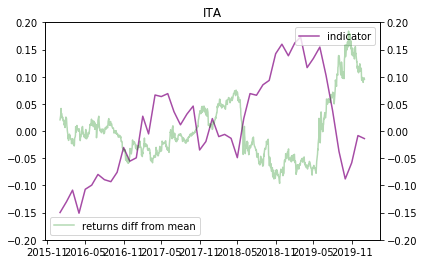

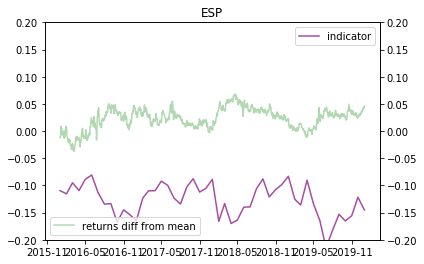

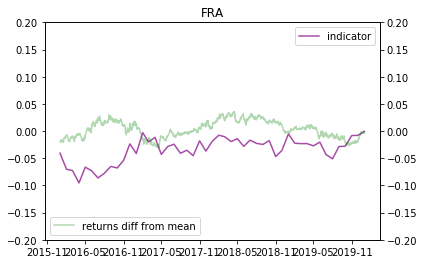

In [96]:
locs = ["JPN", "USA", "CHE", "AUS", "ITA", "ESP", "FRA"]
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    signal_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signal_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = bond_one_year_rolling_returns.loc[tf[0]:tf[1],country] - bond_one_year_rolling_returns.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()

In [ ]:
#M2 Construction testing
#idea - change in m2 can be approximated with average change in m1 and m3

m1_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M')
m2_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
m3_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS3..B', start_date, '', 'M',list(filter(lambda x: x !='USA', countryList)))


In [ ]:
m2_proxy = .5 * m1_money_supply + .5 * m3_money_supply

In [ ]:
delta_m2 = m2_money_supply.pct_change(1)
delta_m2_proxy = m2_proxy.pct_change(1)

In [ ]:
delta_m2_frontend_smoothed = m2_money_supply / m2_money_supply.rolling(7).mean().shift(1)
delta_m2_proxy_frontend_smoothed = m2_proxy / m2_proxy.rolling(7).mean().shift()

In [ ]:

tf = ("1980-1-1", "2020-1-1")
#tf = ("2005-1-1", "2020-1-1")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(delta_m2.loc[tf[0]:tf[1],locs].to_timestamp())
ax1.plot(delta_m2_proxy.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange", alpha = .4)
plt.show()


In [ ]:
locs = ["JPN"]
indicator_two_attempt_one = delta_m2_proxy_frontend_smoothed
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(indicator_two_attempt_one.loc[tf[0]:tf[1],locs].to_timestamp())
ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],locs].to_timestamp(), color = "orange")
plt.show()
#tf = ("2005-1-1", "2020-1-1")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(delta_m2_frontend_smoothed.loc[tf[0] : tf[1], locs].to_timestamp())
ax1.plot(delta_m2_proxy_frontend_smoothed.loc[tf[0] : tf[1], locs].to_timestamp(), color = "orange", alpha = .4)
plt.show()

In [ ]:
#Indicator 2 testing 0
#Now see if this indicator is worth anything at all - want to investigate change in money supply vs returns and yields

locs = countryList[1:5]
indicator_two_attempt_one.loc[:,locs].plot()
for country in locs:
    indicator_two_attempt_one = delta_m2_proxy_frontend_smoothed
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(indicator_two_attempt_one.loc[tf[0]:tf[1],country].to_timestamp())
    ax2.plot(bond_two_year_rolling_returns.loc[tf[0]:tf[1],country].to_timestamp(), color = "orange")
    plt.title(country)
    plt.show()

In [ ]:
#indicator 3 - current account vs interest rates, current account vs fx, current account vs bond returns, current account vs twi
curr_acct_nominal_usd = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..B', start_date, '', 'M')
curr_acct_pct_GDP = dsPuller.ds_country_pull(lambda x: f'{x}CCUR..Q', start_date, '', 'M')

In [ ]:
fxVsUSD = dsPuller.ds_country_pull(lambda x: f'{x}XRUSD.', start_date, '', 'M')
fxNomPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTW..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])

In [ ]:
ct = ["FRA"]
#curr_acct_nominal_usd.loc[tf[0]:tf[1],locs].plot()
#curr_acct_pct_GDP.loc[tf[0]:tf[1],locs].plot()
curr_acct_nominal_usd.plot()
curr_acct_pct_GDP.plot()

plt.show()

In [ ]:
#examine current account vs yields and fx
locs = ["USA"]
for country in locs:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(curr_acct_nominal_usd.loc[:,country].to_timestamp())
    ax2.plot(LongRates.loc[:,country].to_timestamp(), color = "orange")
    ax1.legend(["nominal curr acct"])
    ax2.legend(["yields"], loc='lower left')
    plt.show()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(curr_acct_nominal_usd.loc[:,country].to_timestamp())
    ax2.plot(fxVsUSD.loc[:,country].to_timestamp(), color = "orange")
    ax1.legend(["nominal curr acct"])
    ax2.legend(["fx"], loc='lower left')
    plt.show()

In [ ]:
#same as above but in % gdp terms which is more easily comparable
locs = ["USA"]
for country in locs:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(curr_acct_pct_GDP.loc[:,country].to_timestamp())
    ax2.plot(LongRates.loc[:,country].to_timestamp(), color = "orange")
    ax1.legend(["curr acct % gdp"])
    ax2.legend(["yields"], loc='lower left')
    plt.show()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(curr_acct_pct_GDP.loc[:,country].to_timestamp())
    ax2.plot(fxVsUSD.loc[:,country].to_timestamp(), color = "orange")
    ax1.legend(["curr acct % gdp"])
    ax2.legend(["fx"], loc='lower left')
    plt.show()

In [ ]:
#want to compare previous graphs across countries perhaps to determine what "norms" are
#will come back to this
#let's check twi vs fx to see if these are similar

In [ ]:
#Indicator 4 ideas - fx vs bond returns, twi vs bond returns, fx vs yields - if currency weakens, more money is spent abroad
#should keep inflation low, interest rates low, good for returns

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(fx.loc[:,country].to_timestamp())
ax2.plot(LongRates.loc[:,country].to_timestamp(), color = "orange")
ax1.legend(["pct_gdp"])
plt.show()

In [ ]:
#Indicator 5



In [ ]:
#Indicator 6



In [ ]:
gdpdata = dl.pull("CurrAcctPctGDP")
growth = dl.pull('GDP/Nominal')
growth2 = dl.pull('GDP/Real')
bonds = bondReturnIdx_locFX

In [ ]:
#Indicator 7

growth_proxy = growth.rolling(4*5, min_periods=1).mean()
growth2_proxy = growth2.rolling(4*5).mean()


for country in gdpdata.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(growth_proxy[country].to_timestamp(), label="growth", color="green")
    ax1.legend()
    ax2.plot(bond_one_year_rolling_returns[country].to_timestamp())
    ax2.legend()
    plt.title(country)
    plt.show()

In [ ]:
#Global average/normal? Compare mostly through time, but contextualize to 
#global norms to see how it will perform relative to other countries